In [2]:
with open(r"C:\Users\arsha\OneDrive\Desktop\Data_Science\Sem III\NLP\Notebooks\REAGANOMICS.txt",mode='r') as file:
    my_text=file.read()
    

In [3]:
my_clean_text=""
for character in my_text:
    if(character not in [",",".","!","%","\\","\n","\'"]):
        my_clean_text+=character

In [4]:
list_of_all_words=my_clean_text.split(" ")

In [5]:
my_list_unique=[]
for ele in list_of_all_words:
    if ele not in my_list_unique:
        my_list_unique.append(ele)

In [6]:
len(my_list_unique)

1563

In [7]:
len(list_of_all_words)

4901

In [7]:
my_dictionary={}
for ele in my_list_unique:
    key=ele
    count=0
    for ele2 in list_of_all_words:
        if key==ele2:
            count+=1
    my_dictionary[key]=count

In [8]:
len(my_dictionary)

1563

In [1]:
#Suppose we want to change the rules where each sentence ends with a new line
import spacy
from spacy.language import Language
@Language.component("custom_sentencizer")
def custom_sentencizer(doc):
    for token in doc[:-1]:
        if token.text == '\n':
            doc[token.i+1].is_sent_start = True
        elif '.'in token.text:
            doc[token.i+1].is_sent_start = False
    return doc

In [2]:
nlp=spacy.load("en_core_web_sm")
nlp.add_pipe("custom_sentencizer", before="parser")

<function __main__.custom_sentencizer(doc)>

In [6]:
mystring=u"This is a sentence\n This is another\nThis is a \nthird sentence"
doc=nlp(mystring)

In [7]:
for sent in doc.sents:
    print(sent)

This is a sentence
 This is another

This is a 

third sentence


In [5]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'custom_sentencizer',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [8]:
import numpy as np
import pandas as pd

In [126]:
df=pd.read_csv(r"C:\Users\arsha\OneDrive\Desktop\download\smsspamcollection.tsv",sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [18]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [16]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

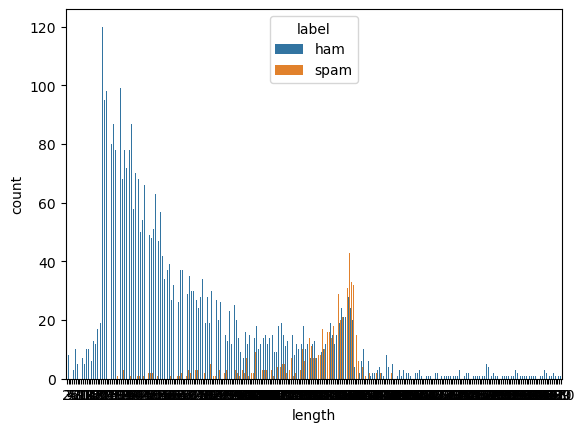

In [20]:
sns.countplot(x='length',data=df,hue='label')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [127]:
X=df[['length','punct']]
y=df['label']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
lr_model= LogisticRegression()

In [26]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
predictions= lr_model.predict(X_test)
predictions


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
# You can make the confusion matrix less confusing by adding labels:
df_mat = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df_mat

,ham,spam
ham,1404,44
spam,219,5


In [32]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [34]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
predictions=svc_model.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672



In [35]:
print(metrics.accuracy_score(y_test,predictions))

0.8720095693779905


In [36]:
#Count_Vectorization

In [40]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [137]:
X=df['message']
y=df['label']

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
count_vect = CountVectorizer()

In [84]:
X_train_counts=count_vect.fit_transform(X_train)
X_test_counts=count_vect.transform(X_test)

In [85]:
print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [86]:
print(X_train_counts.shape)
print(X_test_counts.shape)

(3900, 7263)
(1672, 7263)


In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr_model= LogisticRegression()

In [89]:
lr_model.fit(X_train_counts, y_train)

LogisticRegression()

In [90]:
predictions= lr_model.predict(X_test_counts)

In [91]:
print(metrics.confusion_matrix(y_test,predictions))

[[1445    3]
 [  22  202]]


In [92]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.99      0.90      0.94       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.98      1672



In [93]:
print(metrics.accuracy_score(y_test,predictions))

0.9850478468899522


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
tfidf = TfidfVectorizer()

In [140]:
tfidf.fit(X)

TfidfVectorizer()

In [141]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf= tfidf.transform(X_test)

In [143]:
X_train_tfidf.shape
X_test_tfidf.shape

(1672, 8713)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
LR= LogisticRegression()

In [146]:
LR.fit(X_train_tfidf,y_train)

LogisticRegression()

In [147]:
predictions=LR.predict(X_test_tfidf)

In [148]:
print(metrics.confusion_matrix(y_test,predictions))

[[1446    2]
 [  57  167]]


In [149]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.75      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



In [150]:
from sklearn.svm import LinearSVC

In [151]:
SVC = LinearSVC()

In [153]:
SVC.fit(X_train_tfidf,y_train)

LinearSVC()

In [155]:
predictions = SVC.predict(X_test_tfidf)

In [156]:
print(metrics.confusion_matrix(y_test,predictions))

[[1445    3]
 [  20  204]]


In [157]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.99      0.91      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [158]:
from sklearn.svm import LinearSVC

In [159]:
clf= LinearSVC()

In [160]:
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [163]:
from sklearn.pipeline import Pipeline
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [164]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [165]:
predictions=text_clf.predict(X_test)

In [168]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672

